In [1]:
#!pip install networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [18]:
import pandas as pd

#Made the student names the index
student_data = pd.read_csv("USE2.csv", index_col = 0)
#student_data = pd.read_csv("synthetic_school_enrollment_data.csv")
student_data.head()

,Major,Minor,BCO,IAP,Calculus,Algebra,DCS,Databases,Life Sciences,Economics,CAM,Cellular Biology,Actuarial Science,Mechanics,Statistics
Students,,,,,,,,,,,,,,,
1,Computer Science,None,True,True,True,True,True,True,False,False,False,False,False,False,False
2,Computer Science,None,True,True,True,True,True,True,False,False,False,False,False,False,False
3,Computer Science,None,True,True,True,True,True,True,False,False,False,False,False,False,False
4,Computer Science,None,True,True,True,True,True,True,False,False,False,False,False,False,False
5,Computer Science,None,True,True,True,True,True,True,False,False,False,False,False,False,False


In [19]:
#student_data.loc['Vanessa Harris'].values.tolist()

In [20]:
courses = list(student_data.columns)[3:]
courses

['IAP',
 'Calculus',
 'Algebra',
 'DCS',
 'Databases',
 'Life Sciences',
 'Economics',
 'CAM',
 'Cellular Biology',
 'Actuarial Science',
 'Mechanics',
 'Statistics']

In [21]:
class_network = nx.Graph()
class_network.add_nodes_from(courses)

In [22]:
without_subj = student_data.drop(['Major', 'Minor'], axis=1) # We don’t need major and minor for the moment
#without_subj = without_subj.T # transpose

In [23]:
without_subj.head()

,BCO,IAP,Calculus,Algebra,DCS,Databases,Life Sciences,Economics,CAM,Cellular Biology,Actuarial Science,Mechanics,Statistics
Students,,,,,,,,,,,,,
1,True,True,True,True,True,True,False,False,False,False,False,False,False
2,True,True,True,True,True,True,False,False,False,False,False,False,False
3,True,True,True,True,True,True,False,False,False,False,False,False,False
4,True,True,True,True,True,True,False,False,False,False,False,False,False
5,True,True,True,True,True,True,False,False,False,False,False,False,False


In [24]:
name_list = list(without_subj.index)

In [25]:
list_of_overlaps = []

# For each student(index) it takes a row using loc and check which values are true inorder to create stud_courses which is the list of courses/subjects a student is doing
for student in name_list:
    stud_courses = []
    for i in range(len(without_subj.loc[student])):
        course = without_subj.loc[student][i]
        if course == True:
            stud_courses.append(without_subj.columns[i])
    list_of_overlaps.append(stud_courses)

In [26]:
list_of_overlaps[:2]

[['BCO', 'IAP', 'Calculus', 'Algebra', 'DCS', 'Databases'],
 ['BCO', 'IAP', 'Calculus', 'Algebra', 'DCS', 'Databases']]

In [27]:
import itertools
for pair in itertools.combinations([1,2,3],2):
    print(pair)

(1, 2)
(1, 3)
(2, 3)


In [28]:
for sublist in list_of_overlaps:
    for pair in itertools.combinations(sublist, 2):
        class_network.add_edge(pair[0], pair[1])

In [29]:
n_edges_total = len(list(class_network.edges))
print(n_edges_total)

44


In [30]:
n_nodes = len(list(class_network.nodes))
n_edges_possible = (n_nodes*(n_nodes-1))/2
print(n_nodes)
print(n_edges_possible)

13
78.0


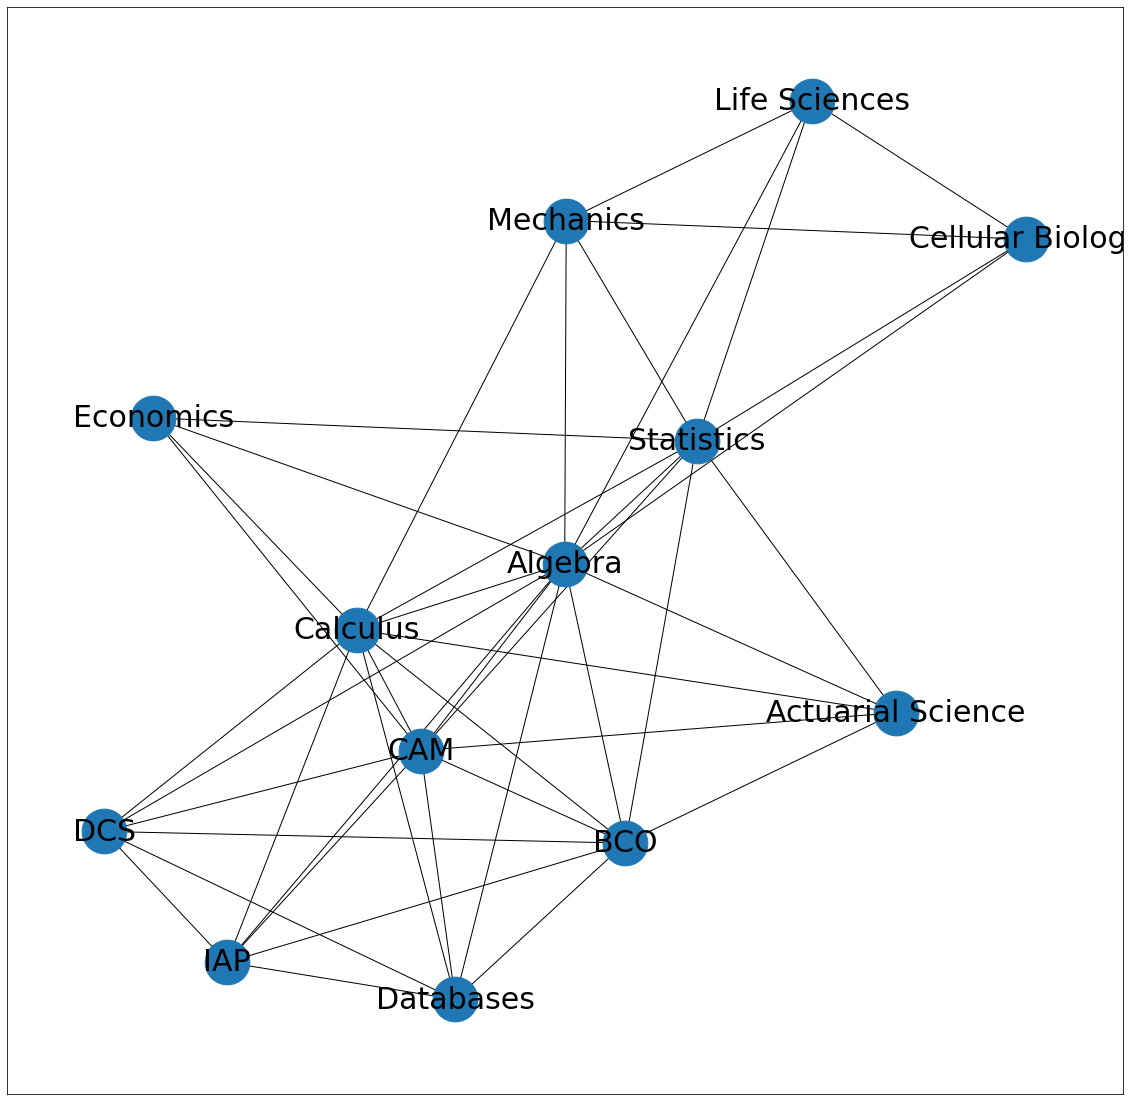

In [31]:
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(class_network, with_labels=True, node_size=2000, font_size = '30')

plt.savefig("Nodes.png", format="PNG")

In [32]:
max(dict(class_network.degree).values())

12

In [33]:
len(courses)

12

In [34]:
colors = ["darkolivegreen", "red", "lime", "mediumaquamarine", "turquoise", "teal", "cadetblue", "dogerblue", "blue", "slateblue", "blueviolet", "magenta", "lightsteelblue",
"lightcoral", "gray", "lightgray", "firebrick", "red", "chocolate", "darkorange", "moccasin", "gold", "yellow"]

In [35]:
from datetime import datetime
dates = []
calendar = {}
for i in list(range(14,20)):
    for j in list(range(10,18,2)):
        date = datetime(2021, 11, i, j, 0)
        dates.append(date)
        calendar[date] = []

In [36]:
from_color_to_date = {col: dates[i] for i, col in enumerate(colors)}

In [37]:
example = nx.path_graph(3)
color_list = ["gold", "red", "violet", "pink", "limegreen",
              "violet", "darkorange"]

for i in range(3):
    example.nodes[i]["color"] = color_list[i]
    
    
example.nodes.data()

NodeDataView({0: {'color': 'gold'}, 1: {'color': 'red'}, 2: {'color': 'violet'}})

In [38]:
def greedy_coloring_algorithm(network, colors):
    nodes = list(network.nodes()) 
    random.shuffle(nodes) # step 1 random ordering
    for node in nodes:
        dict_neighbors = dict(network[node])
# gives names of nodes that are neighbors
        nodes_neighbors = list(dict_neighbors.keys())
        
        forbidden_colors = []
        for neighbor in nodes_neighbors:
            example.nodes.data()[1]
            len(example.nodes.data()[1].keys())
            if len(network.nodes.data()[neighbor].keys()) == 0: 
                # if the neighbor has no color, proceed
                continue
            else:
                # if the neighbor has a color,
                # this color is forbidden
                example.nodes.data()[1]['color']
                forbidden_color = network.nodes.data()[neighbor]
                forbidden_color = forbidden_color['color']
                forbidden_colors.append(forbidden_color)
        # assign the first color 
        # that is not forbidden
        for color in colors:
            # step 2: start everytime at the top of the colors,
            # so that the smallest number of colors is used
            if color in forbidden_colors:
                continue
            else:
                # step 3: color one node at the time
                network.nodes[node]['color'] = color
                break

In [39]:
greedy_coloring_algorithm(class_network, colors)

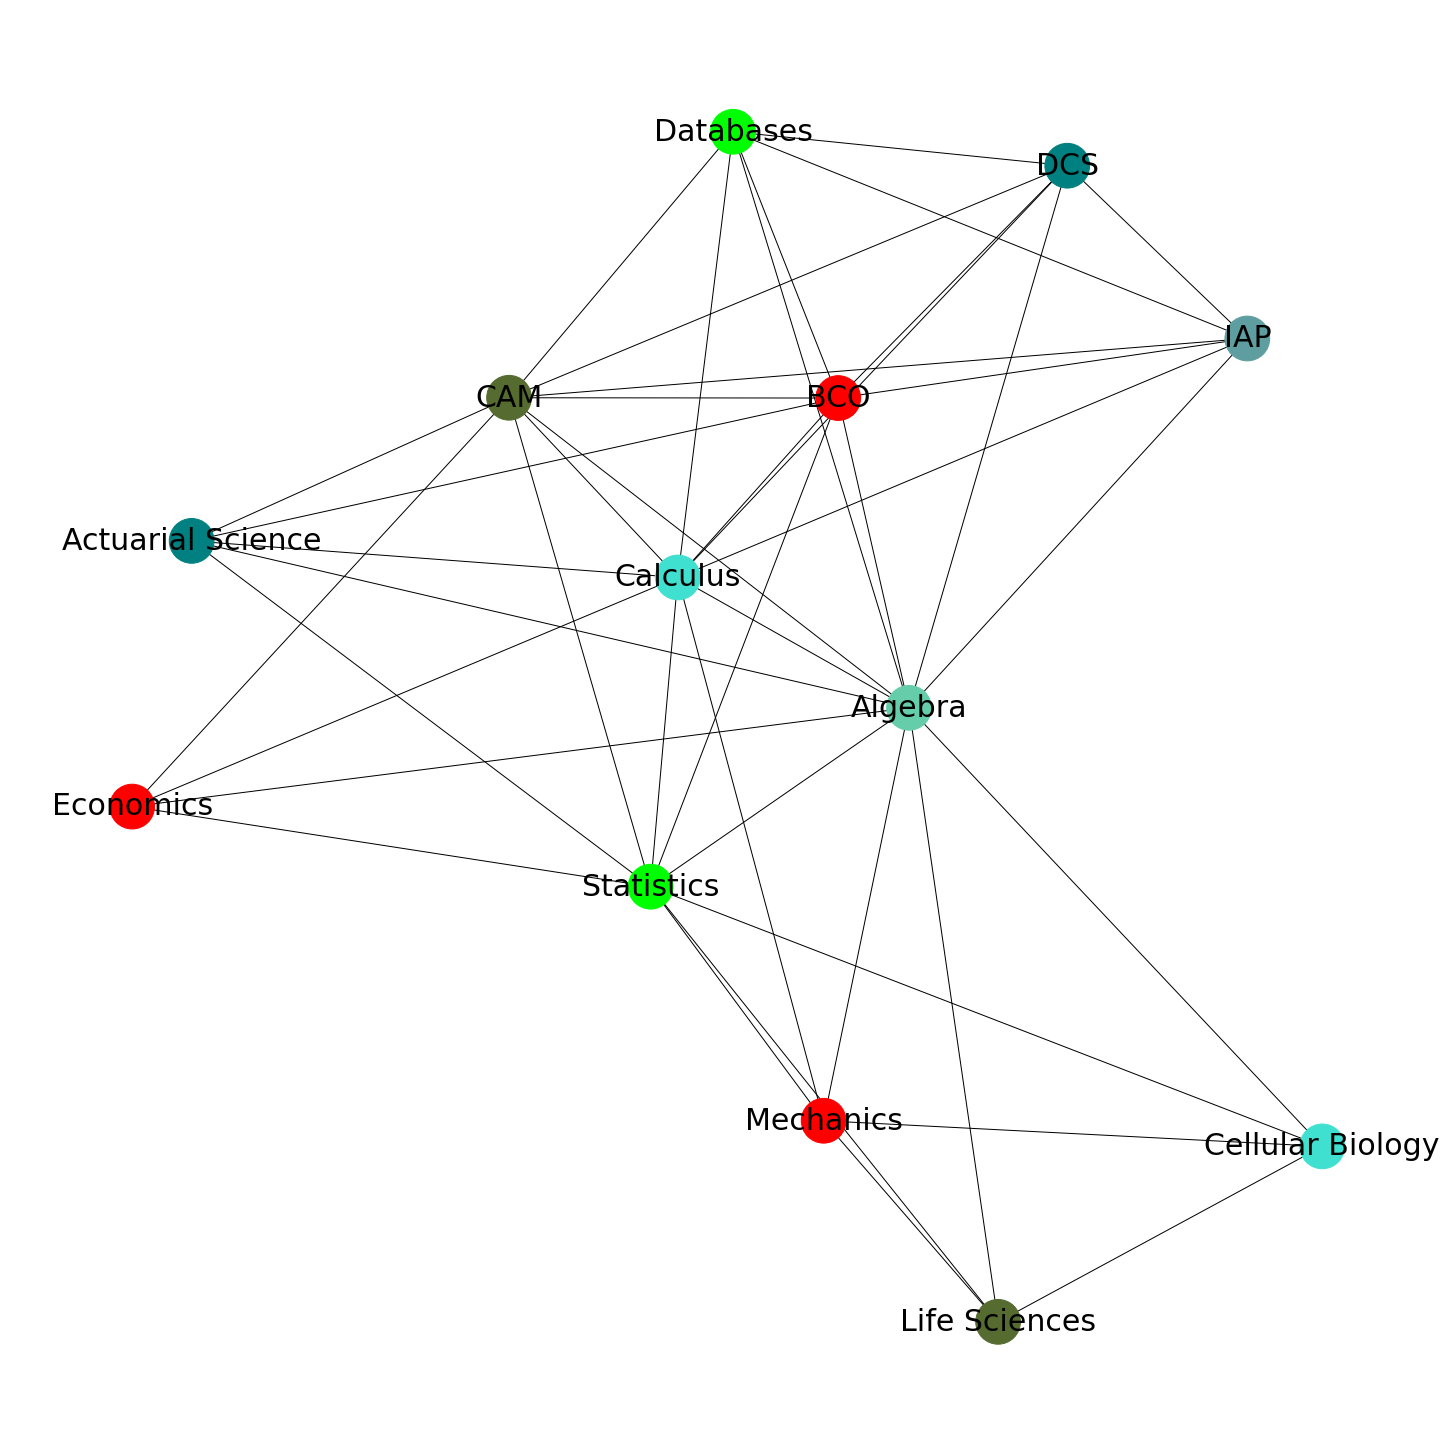

In [46]:
fig = plt.figure(figsize=(20,20))

colors_nodes = [data['color'] for v, data in class_network.nodes(data=True)]
nx.draw(class_network, node_color=colors_nodes, with_labels=True, node_size=2000, font_size = '30')


plt.savefig("Coloured.png", format="PNG")


In [43]:
len(set(colors_nodes))

7

In [123]:
number = []
for i in list(range(0,50)):
    greedy_coloring_algorithm(class_network, colors)
    colors_nodes = [data['color'] for v, data in class_network.nodes(data=True)]
    num_col = len(set(colors_nodes))
    number.append(num_col)

In [124]:
number

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [125]:
for v, data in class_network.nodes(data=True):
    calendar[from_color_to_date[data['color']]].append(v)
max_number_exams_sync = len(max(list(calendar.values()),key=len))
rooms = ["Room "+str(i) for i in list(range(max_number_exams_sync))]
pd.DataFrame.from_dict(calendar, orient='index', columns=rooms)

,Room 0
2021-11-14 10:00:00,BCO
2021-11-14 12:00:00,None
2021-11-14 14:00:00,Calculus
2021-11-14 16:00:00,DCS
2021-11-15 10:00:00,DATABASES
2021-11-15 12:00:00,Algebra
2021-11-15 14:00:00,None
2021-11-15 16:00:00,None
2021-11-16 10:00:00,None
2021-11-16 12:00:00,None
